# Main Jupyter Noootbook

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import train_test_split
from nlp_preprocessing import VIA_GoGo
import seaborn as sns
import gensim
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.layers import Dropout, Embedding, SpatialDropout1D, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Data Overview

In [1]:
tweet_df = pd.read_csv('data/db_tweet_emotion.csv', encoding= 'unicode_escape')

NameError: name 'pd' is not defined

In [ ]:
tweet_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [ ]:
tweet_df.info()

NameError: name 'tweet_df' is not defined

In [ ]:
tweet_df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [ ]:
tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [ ]:
tweet_df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

### Clean Up & Tokenize

In [ ]:
# Instantiating tokenizer
tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")

# Create a list of stopwords in English
sw = stopwords.words('english')

In [ ]:
# instantiating Via_GoGo()
vg = VIA_GoGo()

# Creating a cleaned and shaped dataframe
clean_df = vg.clean_tokenizer(tweet_df, tokenizer, sw)
clean_df

,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,-1,Apple,"[wesley83, 3g, iphone, hr, tweeting, rise_aust...",wesley83 3g iphone hr tweeting rise_austin dea...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,-1,Apple,"[sxsw, hope, year, festival, crashy, year, iph...",sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...,...,...,...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,0,Google,"[mention, yup, third, app, yet, android, sugge...",mention yup third app yet android suggestion s...
9085,ipad everywhere. #sxsw {link},iPad,Positive emotion,1,Apple,"[ipad, everywhere, sxsw, link]",ipad everywhere sxsw link
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,0,Google,"[wave, buzz, rt, mention, interrupt, regularly...",wave buzz rt mention interrupt regularly sched...
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0,Google,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...


In [ ]:
binary_df = clean_df[clean_df.emotion_num != 0]

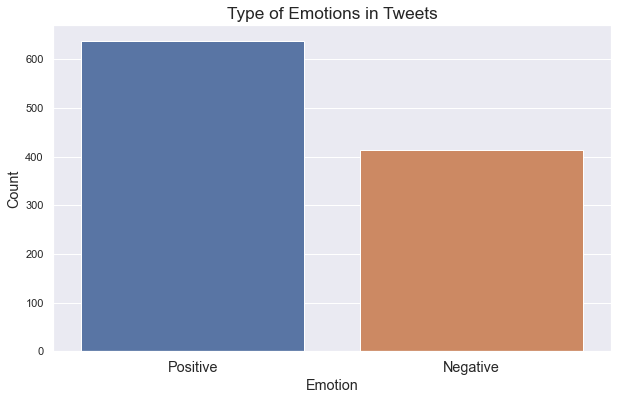

In [ ]:
# visualize the counts of each emotion type
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=binary_df, 
    x="directed_at",
    order=binary_df.brand.value_counts().index)

ax.set_title('Type of Emotions in Tweets',fontsize='x-large')
ax.set_xlabel('Emotion',fontsize='large')
ax.set_ylabel('Count',fontsize='large')
plt.xticks(range(2), ['Positive','Negative'],fontweight='light', fontsize='large')

plt.show();

### Modeling Sections
1. Baseline
2. Tuned
3. Word2Vec
4. Neural Network

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(binary_df.joined_tokens, 
                                                    binary_df.emotion_num, 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [ ]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(clean_df.joined_tokens, 
                                                    clean_df.emotion_num, 
                                                    test_size= 0.25,
                                                    random_state= 5)

#### Baseline

In [ ]:
# Using Linear Support Vector Machine
sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])

# Using Naive Bayes
naive = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

# Using Logistic Regression
lin_reg = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

# Using Random Forest
rfc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])


In [ ]:
# Fitting and predicting SGD
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8816234498308907


In [ ]:
# Fitting and predicting Naive Bayes
naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8331454340473506


In [ ]:
# Fitting and predicting Logistic Regression

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8365276211950394


In [ ]:
# Fitting and predicting Random Forest

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.874859075535513


#### Tuned Binary

##### Binary

In [ ]:
sgd_tuned = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier())
              ])

naive_tuned = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

lin_reg_tuned = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=5)),
              ])

rfc_tuned = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(max_depth=800, n_estimators=100)),
              ])

In [ ]:
# Fitting and predicting tuned SGD Classifier
sgd_tuned.fit(X_train, y_train)

y_pred = sgd_tuned.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8917700112739572


In [ ]:
# Fitting and predicting tuned Naive Bayes
naive_tuned.fit(X_train, y_train)

y_pred = naive_tuned.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8421645997745209


In [ ]:
# Fitting and predicting tuned Logistic Regression
lin_reg_tuned.fit(X_train, y_train)

y_pred = lin_reg_tuned.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.830890642615558


In [ ]:
# Fitting and predicting tuned Random Forest
rfc_tuned.fit(X_train, y_train)

y_pred = rfc_tuned.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8737316798196166


##### Multiclass

In [ ]:
sge_tuned_mc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier())
              ])

naive_tuned_mc = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

lin_reg_tuned_mc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(solver='newton-cg', n_jobs=5)),
              ])

rfc_tuned_mc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(max_depth=800, n_estimators=100, class_weight='balanced')),
              ])

In [ ]:
# Fitting and predicting tuned SGD Classifier (MC)
sge_tuned_mc.fit(X_train_mc, y_train_mc)

y_pred = sge_tuned_mc.predict(X_test_mc)

print('accuracy %s' % accuracy_score(y_pred, y_test_mc))

accuracy 0.7166739991201055


In [ ]:
# Fitting and predicting tuned Naive Bayes (MC)
naive_tuned_mc.fit(X_train_mc, y_train_mc)

y_pred = naive_tuned_mc.predict(X_test_mc)

print('accuracy %s' % accuracy_score(y_pred, y_test_mc))

accuracy 0.6717993840739112


In [ ]:
# Fitting and predicting tuned Logistic Regression (MC)
lin_reg_tuned_mc.fit(X_train_mc, y_train_mc)

y_pred = lin_reg_tuned.predict(X_test_mc)

print('accuracy %s' % accuracy_score(y_pred, y_test_mc))

accuracy 0.32028156621205456


In [ ]:
# Fitting and predicting tuned Random Forest (MC)
rfc_tuned_mc.fit(X_train_mc, y_train_mc)

y_pred = rfc_tuned_mc.predict(X_test_mc)

print('accuracy %s' % accuracy_score(y_pred, y_test_mc))

accuracy 0.6827980642322922


#### Word2Vec

In [ ]:
model_w2v = gensim.models.Word2Vec(
            sentences=clean_df.tweet_text_tokenized,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(clean_df.tweet_text_tokenized, total_examples=len(clean_df.tweet_text_tokenized), epochs=20)

(1486348, 2240820)

In [ ]:
model_w2v.wv['iphone'].shape

(200,)

In [ ]:
model_w2v.wv.most_similar(positive="iphone")

[('merchant', 0.4762386679649353),
 ('handy', 0.46627989411354065),
 ('wew', 0.4655507206916809),
 ('desperate', 0.4641048312187195),
 ('yayrt', 0.4582692086696625),
 ('sync', 0.45691293478012085),
 ('ambassador', 0.4554169774055481),
 ('loaded', 0.45381540060043335),
 ('yo', 0.45165425539016724),
 ('pak', 0.45151621103286743)]

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
clean_df.reset_index(inplace=True, drop=True)

In [ ]:
wordvec_arrays = np.zeros((len(clean_df.tweet_text_tokenized), 200))

for i in range(len(clean_df.emotion_num)):
    wordvec_arrays[i,:] = word_vector(clean_df.tweet_text_tokenized[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape   

(9089, 200)

In [ ]:
clean_df.emotion_num.shape

(9089,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wordvec_df, 
                                                    clean_df.emotion_num, 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [ ]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

ValueError: could not convert string to float: 'sxsw lost iphone black parra hard case pink cloud thunderbolt back email deshi80227 mention thanks'

In [ ]:
clf = SGDClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6599208095028597


#### Neural Network

In [ ]:
clean_df['emotion_num_nn'] = clean_df['emotion_num']

In [ ]:
clean_df['emotion_num_nn'] = clean_df['emotion_num_nn'].replace(-1, 2)

In [ ]:
X = clean_df['joined_tokens']
y =  clean_df['emotion_num_nn']

In [ ]:
# Append Feature, then vectorize

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=1000)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print('Shape of train features tensor:', X_train_vec.shape)
print('Shape of test features tensor:', X_test_vec.shape)

Shape of train features tensor: (6816, 1000)
Shape of test features tensor: (2273, 1000)


In [ ]:
print('Shape of train label tensor:', y_train.shape)
print('Shape of test label tensor:', y_test.shape)

Shape of train label tensor: (6816,)
Shape of test label tensor: (2273,)


In [ ]:
model = Sequential()
model.add(layers.Dense(1500, input_dim=(1000), activation='relu', ))
model.add(Dropout(.5))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

2022-02-16 11:04:28.034428: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-16 11:04:28.035923: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_vec, y_train, epochs=6, batch_size=100, validation_split=.20, verbose=1)

Train on 5452 samples, validate on 1364 samples
Epoch 1/6
5452/5452 [==============================] - 2s 343us/sample - loss: 0.8563 - accuracy: 0.6044 - val_loss: 0.7449 - val_accuracy: 0.6503
Epoch 2/6
5452/5452 [==============================] - 1s 265us/sample - loss: 0.7067 - accuracy: 0.6854 - val_loss: 0.7144 - val_accuracy: 0.6723
Epoch 3/6
5452/5452 [==============================] - 1s 269us/sample - loss: 0.6260 - accuracy: 0.7263 - val_loss: 0.7123 - val_accuracy: 0.6745
Epoch 4/6
5452/5452 [==============================] - 2s 284us/sample - loss: 0.5489 - accuracy: 0.7638 - val_loss: 0.7279 - val_accuracy: 0.6672
Epoch 5/6
5452/5452 [==============================] - 2s 278us/sample - loss: 0.4741 - accuracy: 0.8085 - val_loss: 0.7685 - val_accuracy: 0.6767
Epoch 6/6
5452/5452 [==============================] - 1s 260us/sample - loss: 0.3999 - accuracy: 0.8457 - val_loss: 0.8182 - val_accuracy: 0.6833


In [ ]:
results = model.evaluate(X_test_vec, y_test, batch_size=10)
print("test loss, test acc:", results)

2273/2273 [==============================] - 1s 251us/sample - loss: 0.8175 - accuracy: 0.6828
test loss, test acc: [0.8174869491568337, 0.6827981]


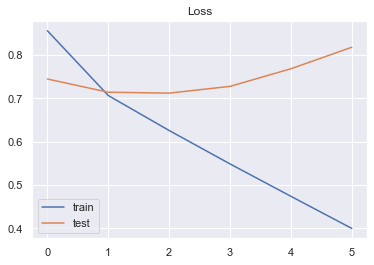

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

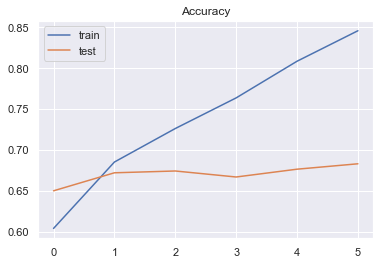

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

### Recurrent Neural Network w/ LSTM

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(clean_df['joined_tokens'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

In [ ]:
X = tokenizer.texts_to_sequences(clean_df['joined_tokens'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

In [ ]:
Y = pd.get_dummies(clean_df['emotion_num']).values
print('Shape of label tensor:', Y.shape)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=5)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(4))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', 
                                                                  patience=3, min_delta=0.0001)])

### Model Improvement / Graphs / Confusion Matrix

In [ ]:
final_preds = sge_tuned_mc.predict(X_test_mc)
final_trues = y_test_mc

In [ ]:
final_counts = confusion_matrix(final_trues, final_preds)
final_counts

array([[  39,   80,   29],
       [  26, 1187,  188],
       [   8,  313,  403]])

In [ ]:
## FINAL MODEL
#sge_tuned_mc
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(sge_tuned_mc, X_test_mc, y_test_mc, ax=ax, display_labels=['neg', 'neutral', 'pos'])
plt.title('Final Model Confusion Matrix')
plt.grid(False)
plt.show();

NameError: name 'plt' is not defined